In [32]:
import pandas as pd

directoryName  = '/content/drive/MyDrive/2023/1 SEMESTRE/SolangeUFRGS/'
data = pd.read_excel(directoryName+'generalData.xlsx')

#precisamos dividir os valores de Titanio em grupos
tmin = data['Titanium (mg/L)'].min()
tmax = data['Titanium (mg/L)'].max()
tnum = data['Titanium (mg/L)'].count()
print(tmin,tmax,tnum)

0.508 2.674161 323


DATA GROUPING TO MAKE THE PIE CHART.<br>
# TO GROUP, WE NEED TO INFORM THE NUMBER OF CLASSES<br>
<i>k = root(N)</i>, where N is the number of elements in my "column".<br>
(Sturges formula) => k= 1+log2N<br>

# total range(A):
<br>
A = max - min

# Range of Classes(h):
<br>
h = A/k

In [33]:
import math
amplitude = tmax-tmin
k = 1 + math.log2(tnum)
h = amplitude/int(k)
print(amplitude,k,round(h,2))

2.166161 9.335390354693924 0.24


You have to create a function to return the class amplitudes classifying all dataset records in the 9 groups based on the titanium value.

In [34]:
def titaniumGroups(lista):
  groups = []
  for i in lista:
    if pd.isna(i):
      groups.append(-1)
    if tmin <= i < tmin+h:
      groups.append(0)
    if tmin+h <= i < tmin+(2*h):
      groups.append(1)
    if tmin+(2*h) <= i < tmin+(3*h):
      groups.append(2)
    if tmin+(3*h) <= i < tmin+(4*h):
      groups.append(3)
    if tmin+(4*h) <= i < tmin+(5*h):
      groups.append(4)
    if tmin+(5*h) <= i < tmin+(6*h):
      groups.append(5)
    if tmin+(6*h) <= i < tmin+(7*h):
      groups.append(6)
    if tmin+(7*h) <= i < tmin+(8*h):
      groups.append(7)
    if tmin+(8*h) <= i <= tmax:
      groups.append(8)
  return groups    

Need to create a column with the titanium groups in the dataframe

In [35]:
generalData = data.assign(Titanium_Group=titaniumGroups(data['Titanium (mg/L)']) )

In [36]:
generalData

,ID,Group,Smoke,Gender,Alchool,Age,TE (months),ATTM (µg/g),1OHP (µmol/mol creat),AchE,BuchE,Micronucleous,Damage DNA/DNA tail,Titanium (mg/L),Titanium_Group
0,GSA 1,1.0,2.0,1.0,2.0,25.0,10.0,46.961709,NaN,NaN,NaN,0.0,5.33,0.857378,1
1,GSA 2,1.0,1.0,2.0,1.0,11.0,6.0,722.174475,NaN,NaN,NaN,0.0,10.90,1.062415,2
2,GSA 3,1.0,1.0,1.0,1.0,50.0,215.0,124.195192,NaN,NaN,NaN,0.0,13.11,0.794226,1
3,GSA 4,1.0,1.0,1.0,1.0,15.0,4.0,164.646766,NaN,NaN,NaN,1.0,16.19,1.113213,2
4,GSA 5,1.0,2.0,2.0,2.0,24.0,15.0,222.201913,NaN,NaN,NaN,0.0,10.69,1.232235,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,CTG 70,4.0,1.0,1.0,2.0,17.0,0.0,257.588183,1.023946,NaN,NaN,0.0,8.81,1.179998,2
341,CTG 71,4.0,1.0,1.0,2.0,14.0,0.0,64.511100,0.992856,NaN,NaN,0.0,7.78,0.921928,1
342,CTG 72,4.0,1.0,1.0,2.0,56.0,0.0,160.611515,NaN,NaN,NaN,0.0,6.12,NaN,-1
343,CTG 73,4.0,1.0,1.0,2.0,29.0,0.0,92.057496,NaN,NaN,NaN,0.0,9.09,NaN,-1


Control group: GROUPS=4

In [37]:
control_1=generalData[(generalData['Group']==4.0)|(generalData['Group']==1.0)]
control_1.dropna(axis=1, how='all')##remove columns that are completely empty
control_1=control_1.drop(columns=['ID','1OHP (µmol/mol creat)','AchE','BuchE'])
control_1=control_1.dropna()
control_1.describe()

,Group,Smoke,Gender,Alchool,Age,TE (months),ATTM (µg/g),Micronucleous,Damage DNA/DNA tail,Titanium (mg/L),Titanium_Group
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.007812,1.164062,1.156250,1.539062,31.562500,16.796875,358.078861,0.250000,7.718063,1.194685,2.320312
std,1.422519,0.371787,0.364519,0.500430,16.261035,41.435912,677.060241,0.601834,2.397580,0.196801,0.850508
min,1.000000,1.000000,1.000000,1.000000,10.000000,0.000000,1.122085,0.000000,2.270000,0.723603,0.000000
25%,1.000000,1.000000,1.000000,1.000000,17.000000,0.000000,64.443777,0.000000,6.430000,1.075837,2.000000
50%,1.000000,1.000000,1.000000,2.000000,26.000000,6.500000,163.669829,0.000000,7.280000,1.180501,2.000000
75%,4.000000,1.000000,1.000000,2.000000,48.250000,16.000000,411.604210,0.000000,8.820000,1.312941,3.000000
max,4.000000,2.000000,2.000000,2.000000,60.000000,276.000000,5959.995076,4.000000,16.190000,2.017786,6.000000


In [38]:
control_1=control_1.drop(columns=['TE (months)'])

In [39]:
nomesCols = control_1.columns.to_list()
featuresCo1 = control_1[nomesCols[1:len(nomesCols)]]
classesCo1 = control_1[nomesCols[0]]

#split data between training and testing
from sklearn.model_selection import train_test_split

features_treino,features_teste,classes_treino,classes_teste = train_test_split(featuresCo1,
                                                                               classesCo1,
                                                                               test_size=0.3,
                                                                               random_state=2)
#To use decision tree resources from the sklearn.tree library
from sklearn.tree import DecisionTreeClassifier 

arvore = DecisionTreeClassifier()
#training the tree
arvore.fit(features_treino,classes_treino)
resultado = arvore.predict(features_teste)

#evaluates whether the prediction of the tree is as expected (or correct)
from sklearn import metrics

print(metrics.classification_report(classes_teste,resultado))

              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78        27
         4.0       0.50      0.50      0.50        12

    accuracy                           0.69        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.69      0.69      0.69        39



In [40]:
nomesCols

['Group',
 'Smoke',
 'Gender',
 'Alchool',
 'Age',
 'ATTM (µg/g)',
 'Micronucleous',
 'Damage DNA/DNA tail',
 'Titanium (mg/L)',
 'Titanium_Group']

In [41]:
#exports text
from sklearn import tree
representation = tree.export_text(arvore,feature_names=nomesCols[1:])
print(representation)

|--- Titanium (mg/L) <= 1.32
|   |--- ATTM (µg/g) <= 191.58
|   |   |--- Damage DNA/DNA tail <= 8.61
|   |   |   |--- Alchool <= 1.50
|   |   |   |   |--- Titanium (mg/L) <= 0.89
|   |   |   |   |   |--- Gender <= 1.50
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- Gender >  1.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Titanium (mg/L) >  0.89
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Alchool >  1.50
|   |   |   |   |--- Damage DNA/DNA tail <= 7.22
|   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |--- ATTM (µg/g) <= 172.40
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- ATTM (µg/g) >  172.40
|   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- Age >  37.50
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- Damage DNA/DNA tail >  7.22
|   |   |   |   |   |--- class: 4.0
|   |   |--- Damage DNA/DNA tail >  8.61
|   |   |   |--- class: 1.0
|   |--- ATTM (µg/g) >  191.58
|   |  

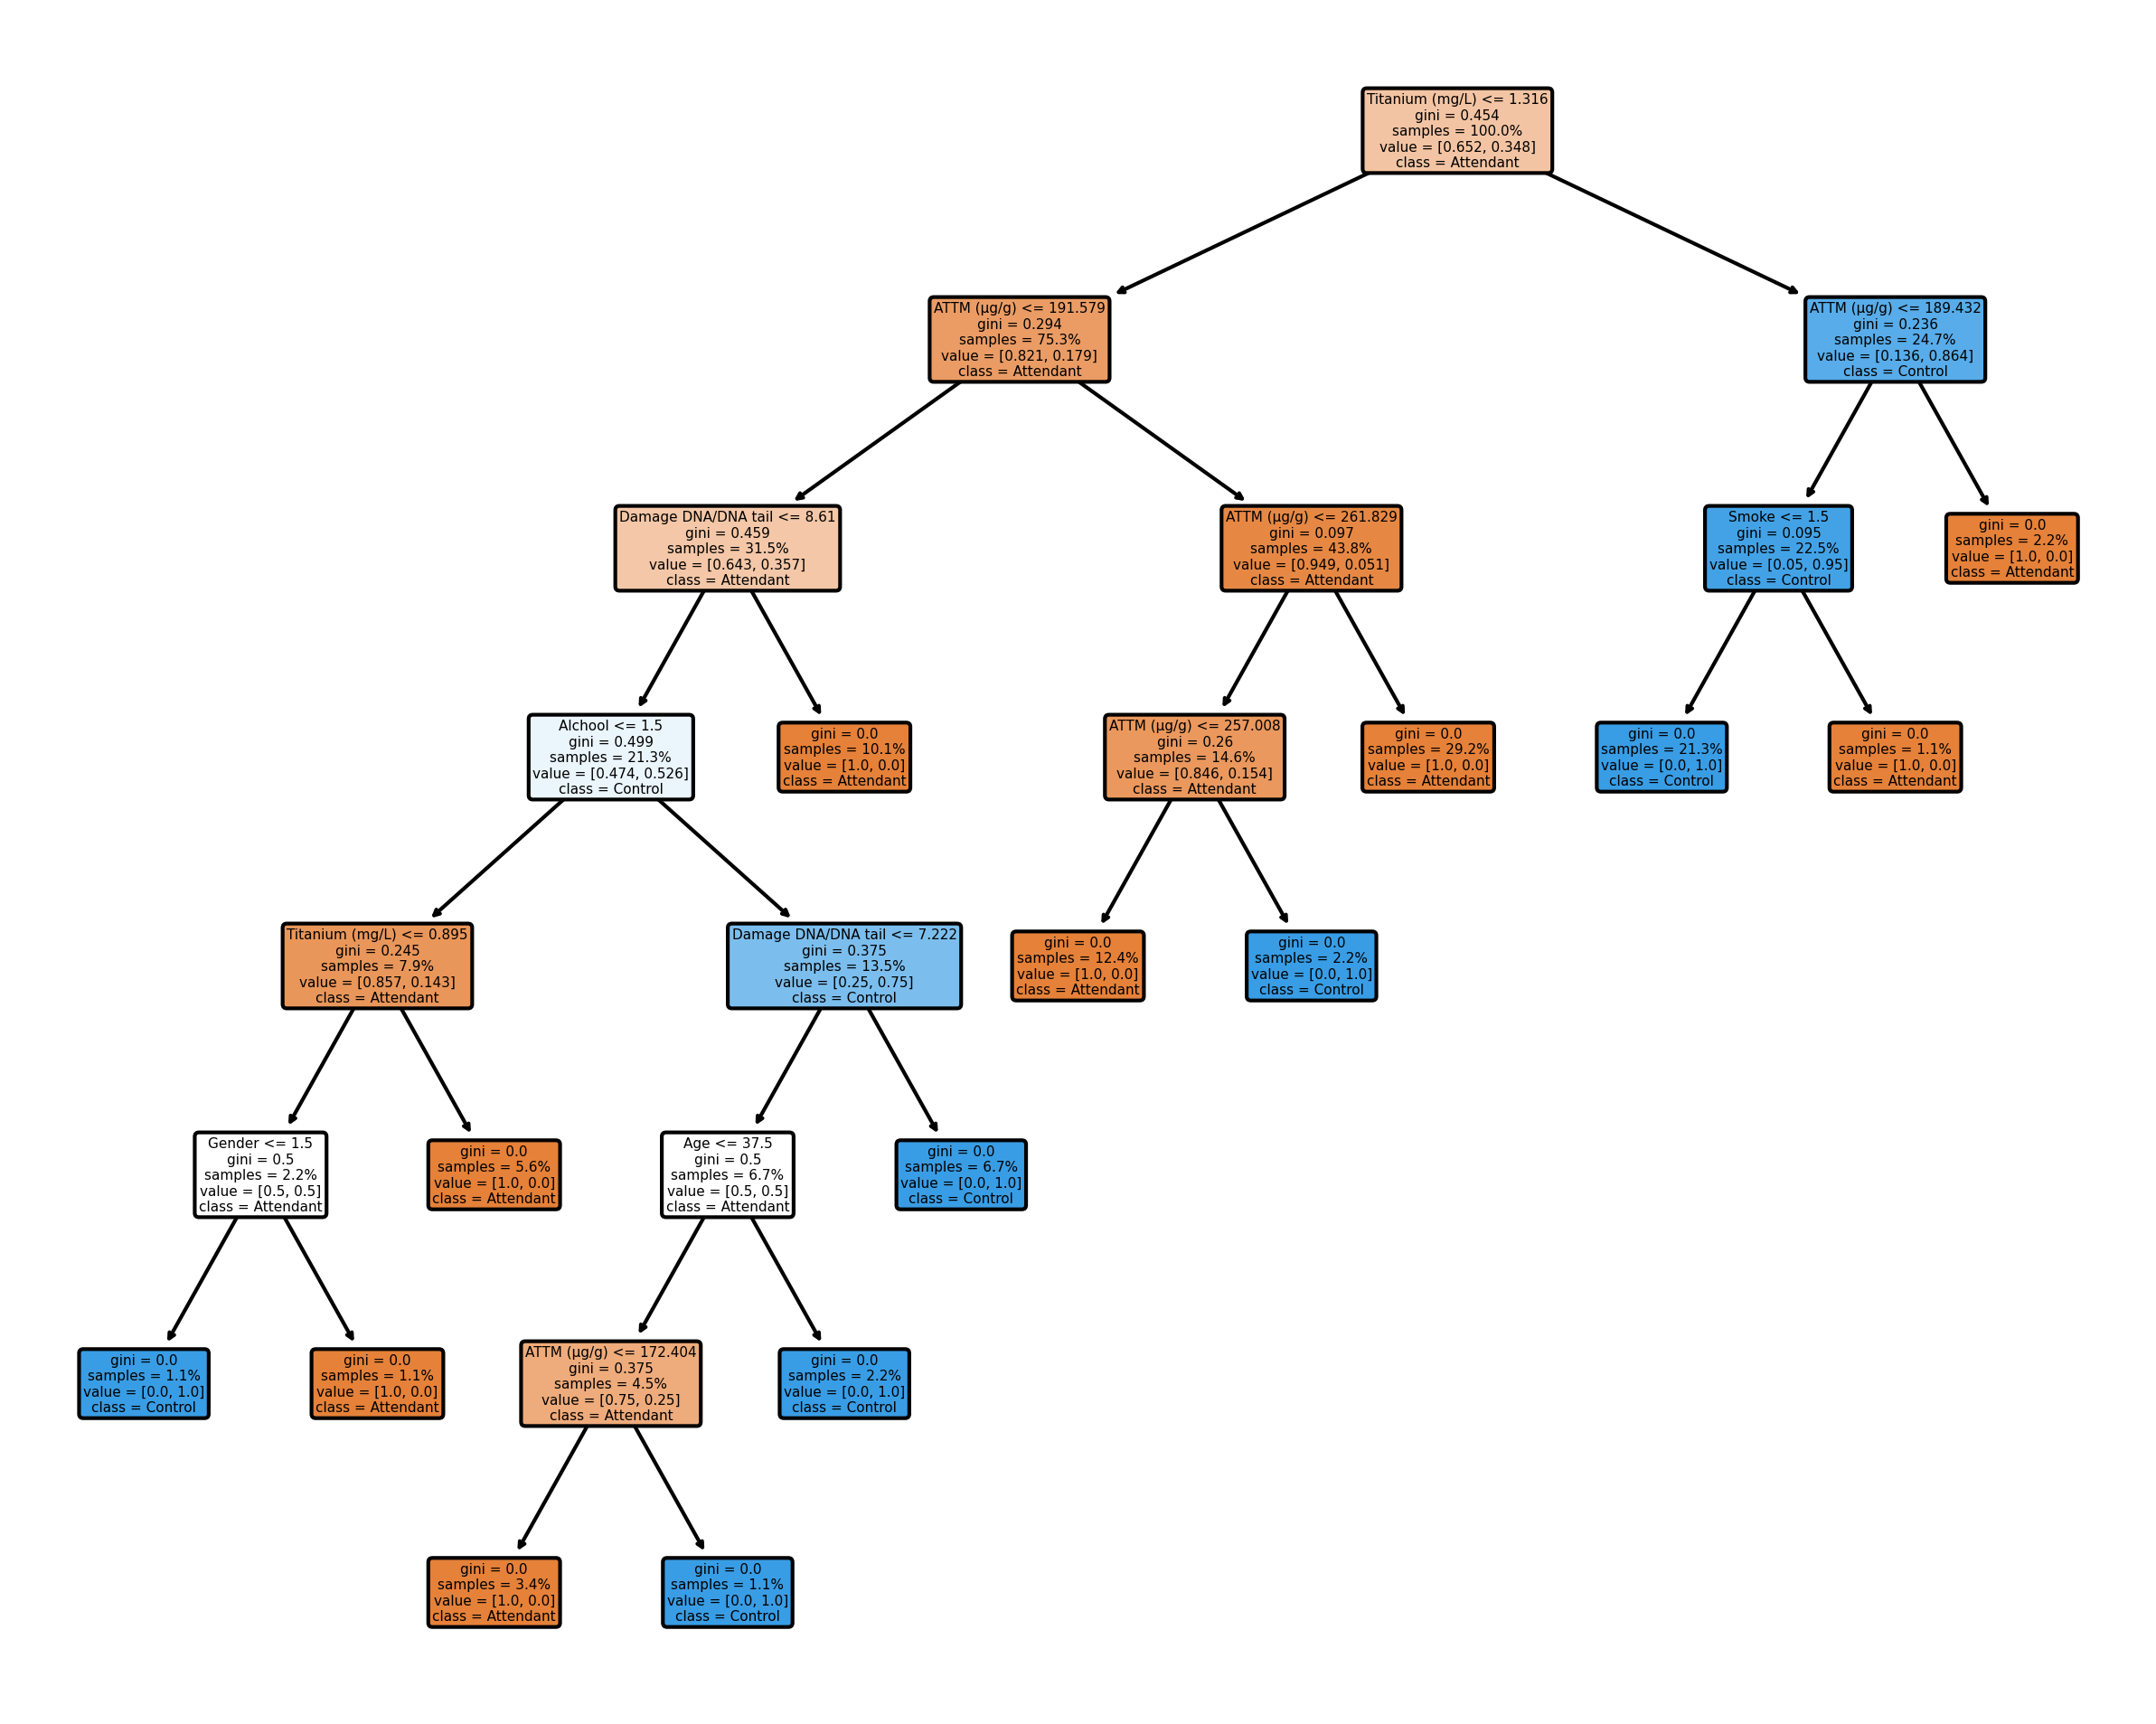

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
feat_nomes = nomesCols[1:len(nomesCols)]
class_nomes = ['Attendant','Control']
tree.plot_tree(arvore,feature_names = feat_nomes,rounded=True,class_names=class_nomes,proportion=True,filled = True)
fig.savefig(directoryName+'control_1-EN.png')

In [43]:
control_1.to_excel(directoryName+'control_1-EN.xlsx')

control_2 compares the dataset values of the group **control** with group 2 (**taxi drivers**)


In [56]:
control_2=generalData[(generalData['Group']==4.0)|(generalData['Group']==2.0)]
control_2=control_2.dropna(axis=1, how='all')#remove columns that are completely empty
control_2=control_2.drop(columns=['ID','ATTM (µg/g)','AchE','BuchE'])
control_2=control_2.dropna()
control_2.describe()

,Group,Smoke,Gender,Alchool,Age,TE (months),1OHP (µmol/mol creat),Micronucleous,Damage DNA/DNA tail,Titanium (mg/L),Titanium_Group
count,124.000000,124.000000,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,2.725806,1.338710,1.0,1.717742,44.798387,128.119355,0.941567,0.491935,9.275349,1.731556,4.540323
std,0.965576,0.475191,0.0,0.451924,15.957250,140.344088,0.890289,0.738004,2.731075,0.462289,1.960584
min,2.000000,1.000000,1.0,1.000000,10.000000,0.000000,0.097192,0.000000,2.270000,0.618358,0.000000
25%,2.000000,1.000000,1.0,1.000000,35.000000,0.000000,0.369764,0.000000,7.487500,1.337502,3.000000
50%,2.000000,1.000000,1.0,2.000000,51.000000,84.000000,0.670568,0.000000,8.715860,1.649814,4.000000
75%,4.000000,2.000000,1.0,2.000000,57.000000,240.000000,1.114215,1.000000,11.352435,2.155560,6.000000
max,4.000000,2.000000,1.0,2.000000,69.000000,468.000000,5.290135,3.000000,17.137957,2.674161,8.000000


In [45]:
control_2=control_2.drop(columns=['TE (months)'])

In [46]:
nomesCols2 = control_2.columns.to_list()
featuresCo2 = control_2[nomesCols2[1:len(nomesCols2)]]
classesCo2 = control_2[nomesCols2[0]]

#dividir os dados entre treino e teste
#from sklearn.model_selection import train_test_split

features_treino2,features_teste2,classes_treino2,classes_teste2 = train_test_split(featuresCo2,
                                                                               classesCo2,
                                                                               test_size=0.3,
                                                                               random_state=2)
#Para usar recursos da árvore de decisão da biblioteca sklearn.tree
#from sklearn.tree import DecisionTreeClassifier 

arvore2 = DecisionTreeClassifier()
#treinando a arvore
arvore2.fit(features_treino2,classes_treino2)
resultado2 = arvore2.predict(features_teste2)

#avalia se a predição da árvore é a esperada (ou correta)
from sklearn import metrics

print(metrics.classification_report(classes_teste2,resultado2))

              precision    recall  f1-score   support

         2.0       0.96      0.93      0.94        27
         4.0       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.90      0.92      0.91        38
weighted avg       0.92      0.92      0.92        38



In [47]:
#exporta texto
representation = tree.export_text(arvore2,feature_names=nomesCols[1:])
print(representation)

|--- Titanium (mg/L) <= 1.62
|   |--- Damage DNA/DNA tail <= 8.39
|   |   |--- Titanium_Group <= 0.50
|   |   |   |--- class: 2.0
|   |   |--- Titanium_Group >  0.50
|   |   |   |--- class: 4.0
|   |--- Damage DNA/DNA tail >  8.39
|   |   |--- Age <= 25.00
|   |   |   |--- class: 4.0
|   |   |--- Age >  25.00
|   |   |   |--- Age <= 57.50
|   |   |   |   |--- class: 2.0
|   |   |   |--- Age >  57.50
|   |   |   |   |--- Age <= 61.00
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- Age >  61.00
|   |   |   |   |   |--- class: 2.0
|--- Titanium (mg/L) >  1.62
|   |--- Damage DNA/DNA tail <= 6.27
|   |   |--- class: 4.0
|   |--- Damage DNA/DNA tail >  6.27
|   |   |--- class: 2.0



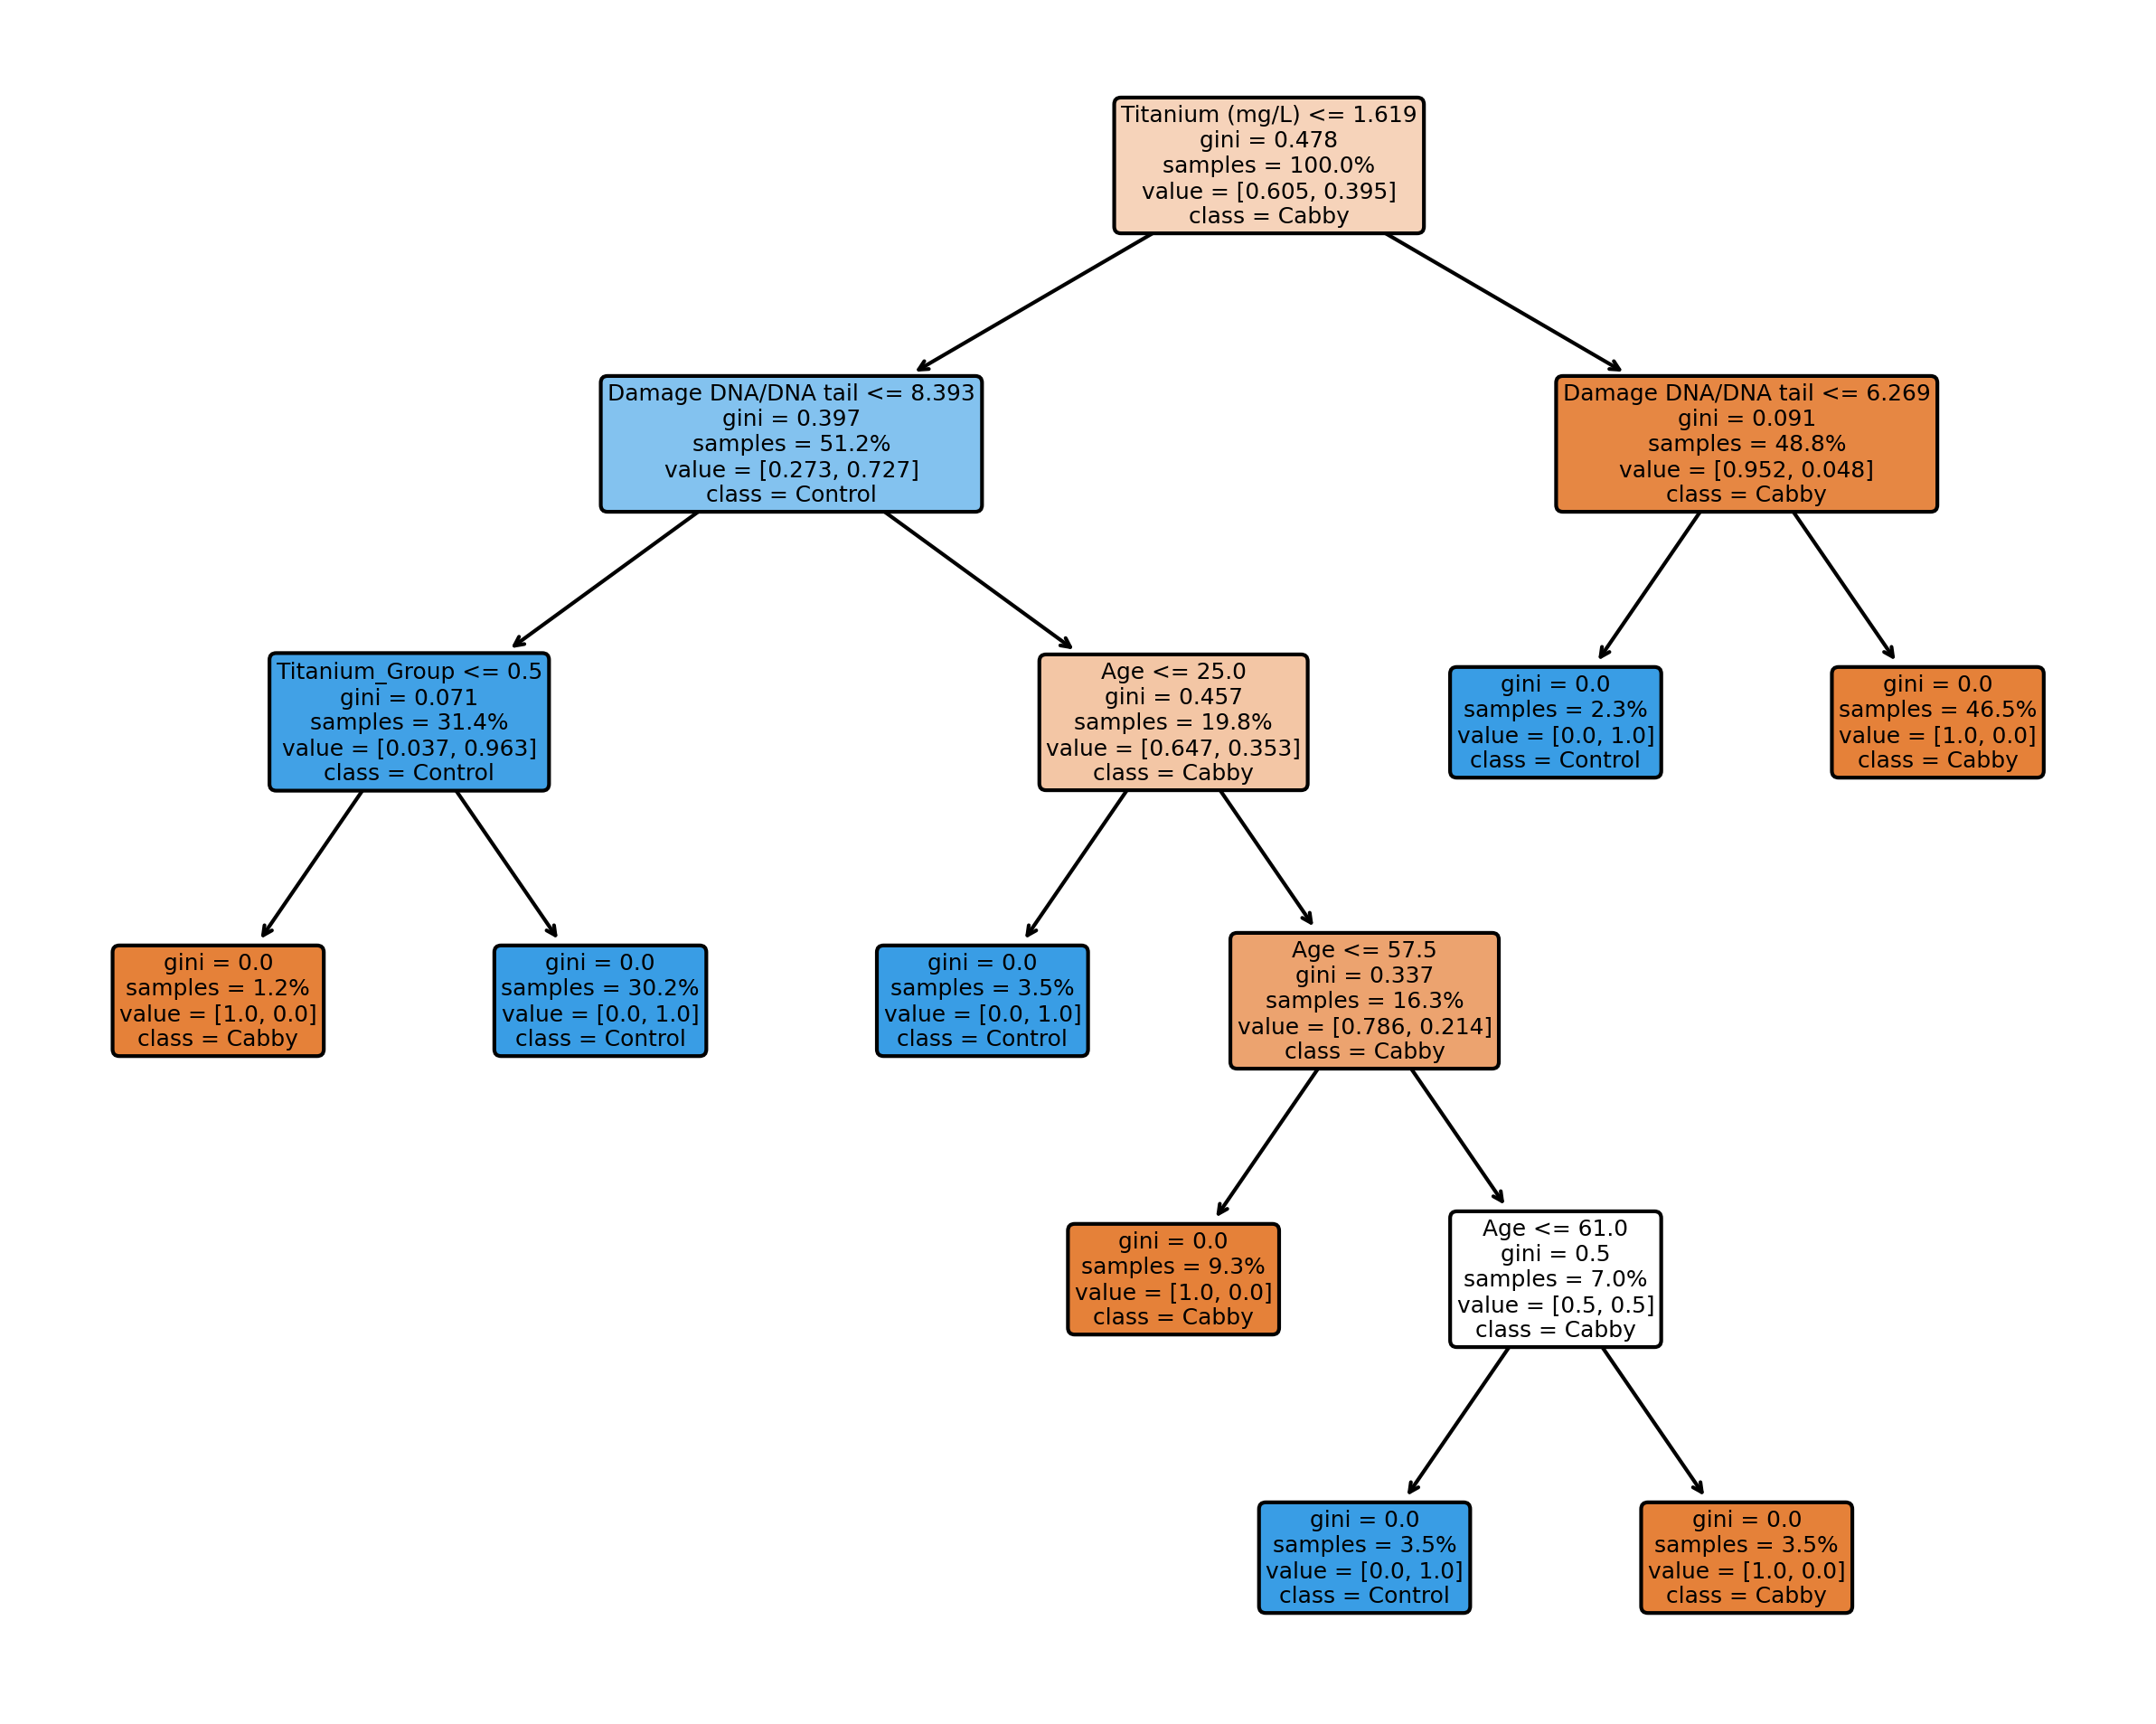

In [48]:
fig2, axes2 = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
feat_nomes2 = nomesCols2[1:len(nomesCols2)]
class_nomes2 = ['Cabby','Control']
tree.plot_tree(arvore2,feature_names = feat_nomes2,rounded=True,class_names=class_nomes2,proportion=True,filled = True)
fig2.savefig(directoryName+'control_2-EN.png')

In [49]:
control_2.to_excel(directoryName+'control_2-EN.xlsx')

Comparison between **control** and group 3 (**farmers**)

In [57]:
control_3=generalData[(generalData['Group']==4.0)|(generalData['Group']==3.0)]
control_3=control_3.dropna(axis=1, how='all')#remove columns that are completely empty
control_3=control_3.drop(columns=['ID','Smoke','Alchool','ATTM (µg/g)','1OHP (µmol/mol creat)'])
control_3=control_3.dropna()

control_3.describe()

,Group,Gender,Age,TE (months),AchE,BuchE,Micronucleous,Damage DNA/DNA tail,Titanium (mg/L),Titanium_Group
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3.475000,1.33750,37.637500,118.560000,15.506705,7.700113,0.125000,9.713971,1.196406,2.300000
std,0.502525,0.47584,14.348505,136.456918,5.365958,1.613101,0.368885,3.691012,0.242873,1.036059
min,3.000000,1.00000,10.000000,0.000000,4.155790,4.191000,0.000000,2.270000,0.600000,0.000000
25%,3.000000,1.00000,28.000000,0.000000,12.440901,6.569500,0.000000,6.977969,1.057750,2.000000
50%,3.000000,1.00000,39.000000,54.000000,15.190475,7.413000,0.000000,8.745000,1.174125,2.000000
75%,4.000000,2.00000,51.000000,240.000000,18.843331,8.771500,0.000000,12.620542,1.375937,3.000000
max,4.000000,2.00000,60.000000,480.000000,28.753037,11.604000,2.000000,20.492976,2.017786,6.000000


In [51]:
control_3=control_3.drop(columns=['TE (months)'])

In [52]:
nomesCols3 = control_3.columns.to_list()
featuresCo3 = control_3[nomesCols3[1:len(nomesCols3)]]
classesCo3 = control_3[nomesCols3[0]]

#dividir os dados entre treino e teste
#from sklearn.model_selection import train_test_split

features_treino3,features_teste3,classes_treino3,classes_teste3 = train_test_split(featuresCo3,
                                                                               classesCo3,
                                                                               test_size=0.3,
                                                                               random_state=2)
#Para usar recursos da árvore de decisão da biblioteca sklearn.tree
#from sklearn.tree import DecisionTreeClassifier 

arvore3 = DecisionTreeClassifier()
#treinando a arvore
arvore3.fit(features_treino3,classes_treino3)
resultado3 = arvore3.predict(features_teste3)

#avalia se a predição da árvore é a esperada (ou correta)
from sklearn import metrics

print(metrics.classification_report(classes_teste3,resultado3))

              precision    recall  f1-score   support

         3.0       1.00      0.92      0.96        12
         4.0       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [53]:
#exports text
representation = tree.export_text(arvore3,feature_names=nomesCols3[1:])
print(representation)

|--- Titanium (mg/L) <= 1.22
|   |--- AchE <= 20.40
|   |   |--- Age <= 54.50
|   |   |   |--- class: 3.0
|   |   |--- Age >  54.50
|   |   |   |--- class: 4.0
|   |--- AchE >  20.40
|   |   |--- class: 4.0
|--- Titanium (mg/L) >  1.22
|   |--- class: 4.0



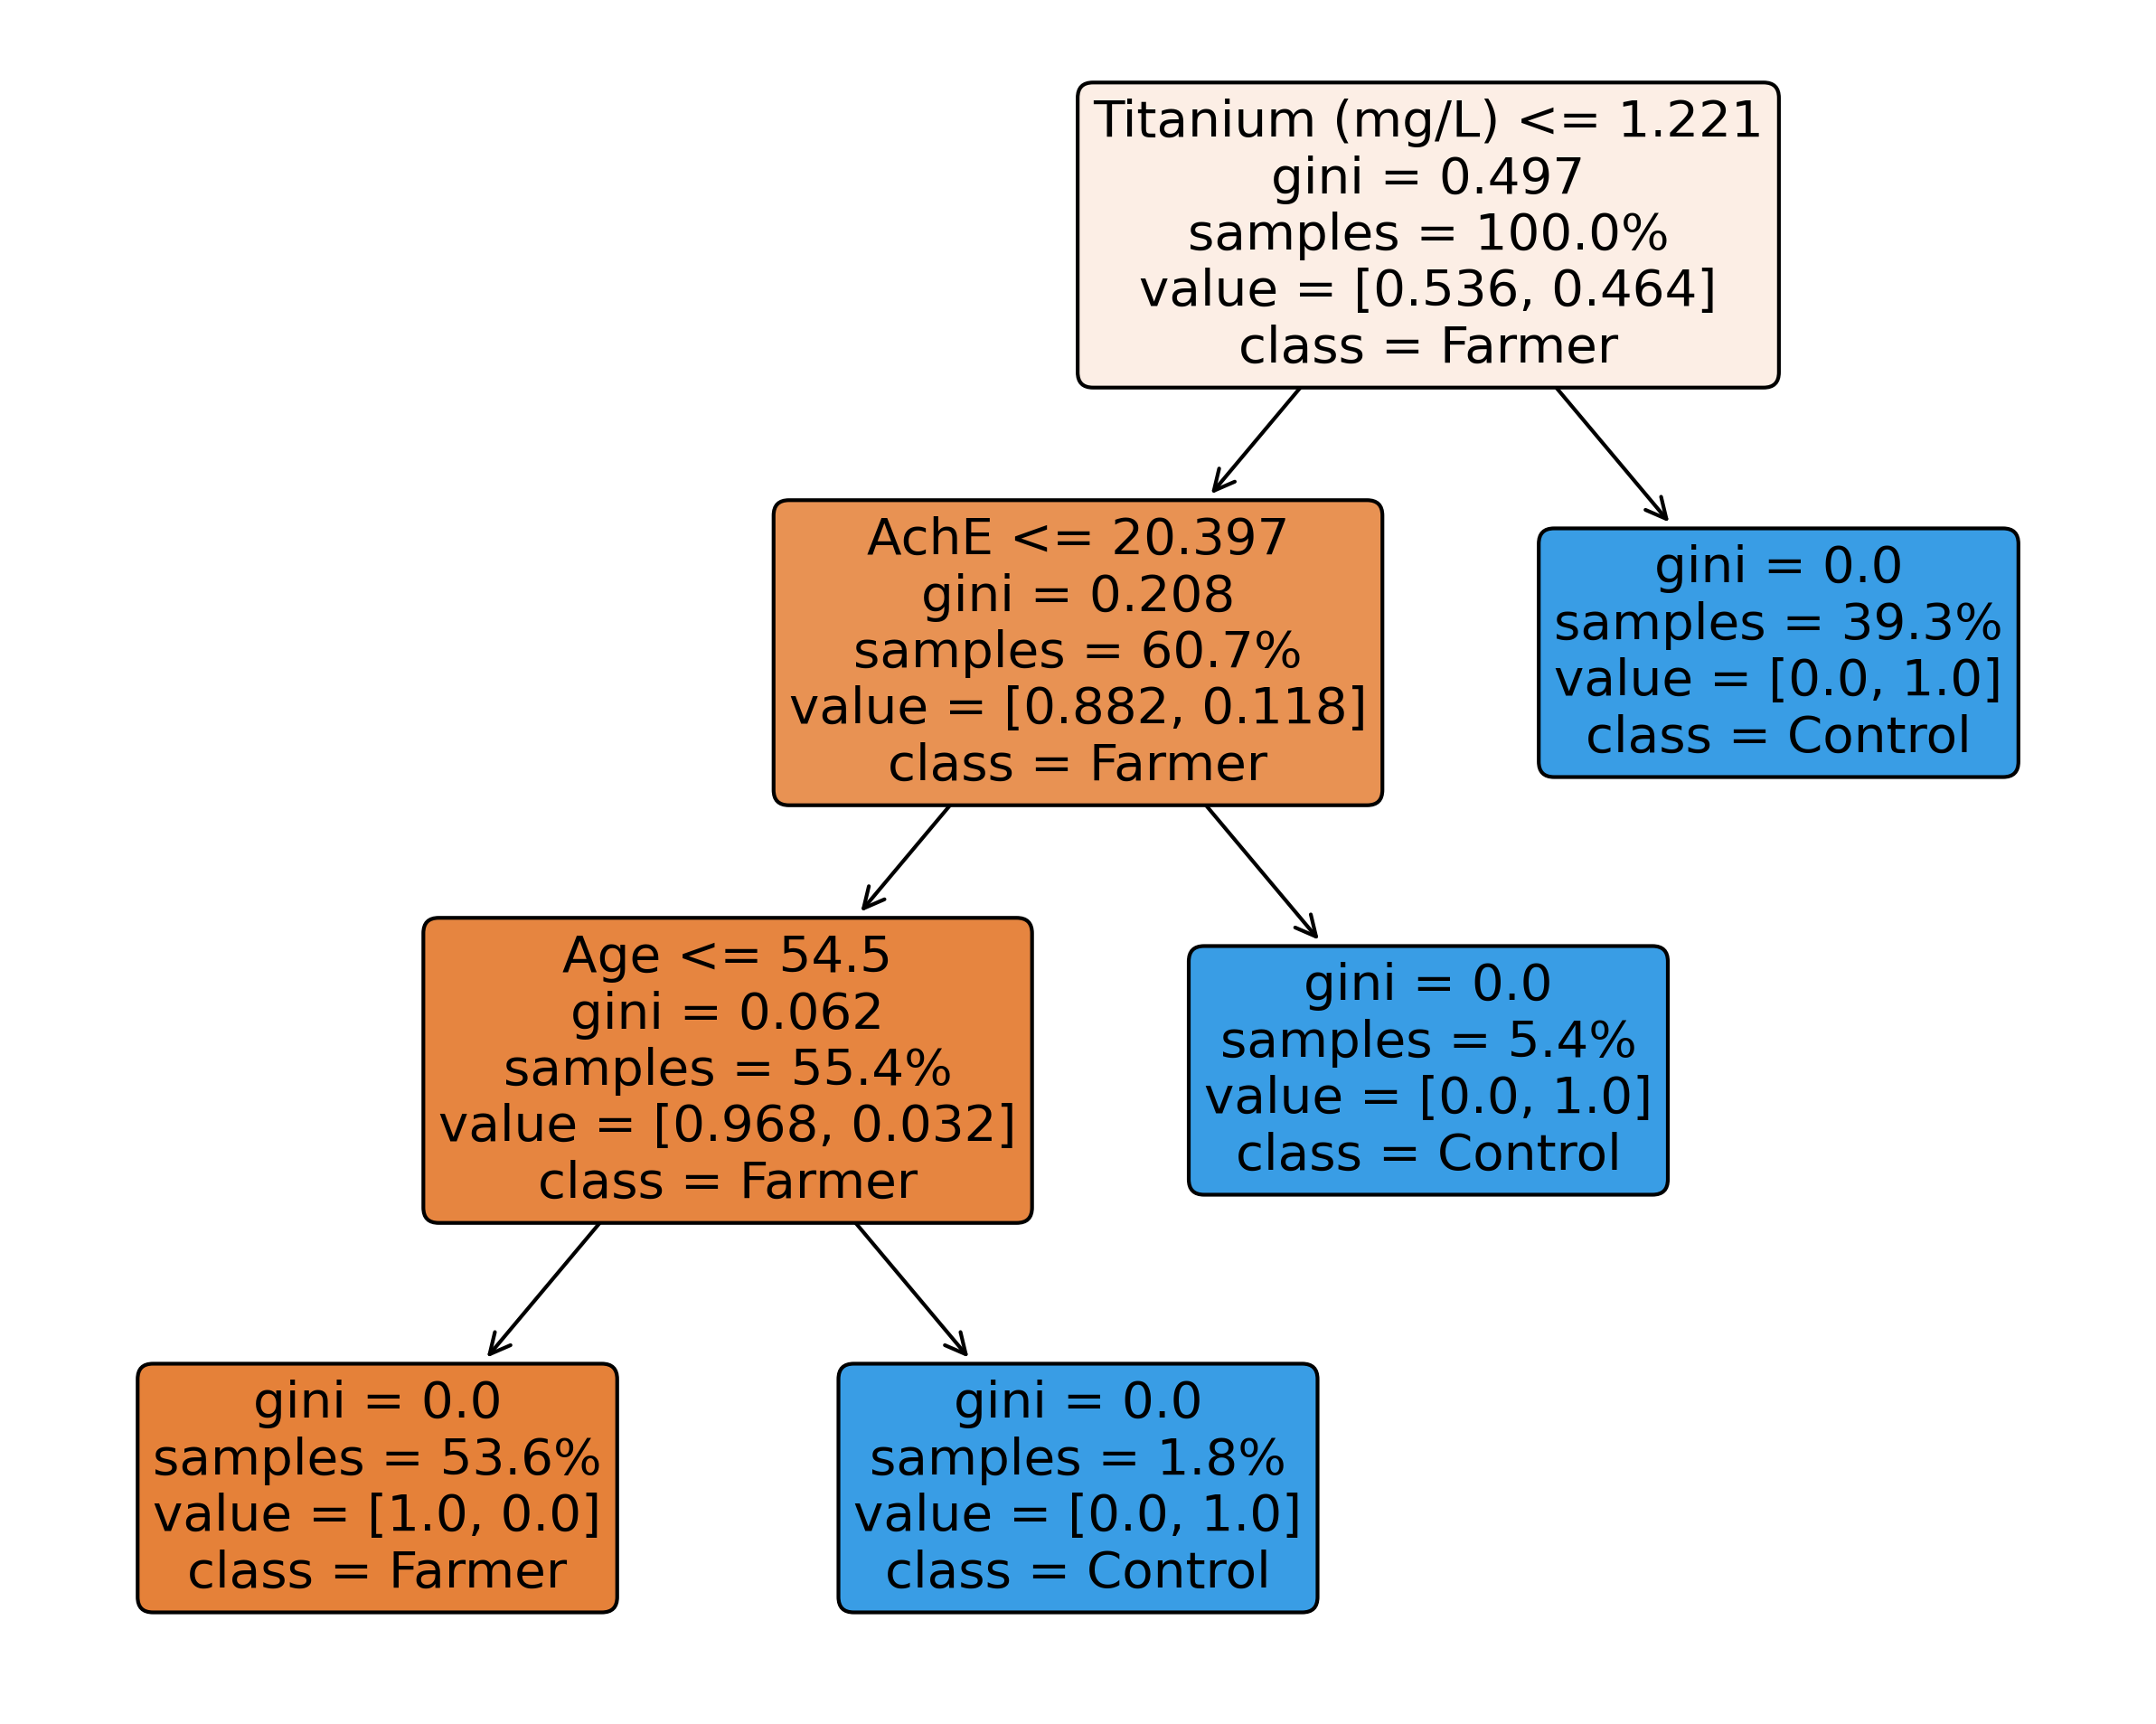

In [54]:
fig3, axes3 = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
feat_nomes3 = nomesCols3[1:len(nomesCols3)]
class_nomes3 = ['Farmer','Control']
tree.plot_tree(arvore3,feature_names = feat_nomes3,rounded=True,class_names=class_nomes3,proportion=True,filled = True)
fig3.savefig(directoryName+'control_3-EN.png')